# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from ratelimit import limits
from scipy.stats import linregress
from flask import Response

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "city.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
weather_url = "http://api.openweathermap.org/data/2.5/weather?q="

#api.openweathermap.org/data/2.5/weather?q=London&appid={weather_api_key}?


city_list = []
city_dict = {}

for city in cities:
    response = requests.get(f"{weather_url}{city}&appid={weather_api_key}").json()
    try: 
        print(response["id"], response["name"])
        city_list.append(response)
    except KeyError:
        print("No Id Avaiable")

city_dict["City"] = [city_list[i]["name"] for i in range(len(city_list))]
city_dict["Lat"] = [city_list[i]["coord"]["lat"] for i in range(len(city_list))]  
city_dict["Lon"] = [city_list[i]["coord"]["lon"] for i in range(len(city_list))]
city_dict["Max_temp"] = [city_list[i]["main"]["temp_max"] for i in range(len(city_list))]
city_dict["Humidity"] = [city_list[i]["main"]["humidity"] for i in range(len(city_list))]
city_dict["Cloudiness"] = [city_list[i]["clouds"]["all"] for i in range(len(city_list))]
city_dict["Winds"] = [city_list[i]["wind"]["speed"] for i in range(len(city_list))]
city_dict["Country"] = [city_list[i]["sys"]["country"] for i in range(len(city_list))]
city_dict["Date"] = [city_list[i]["dt"] for i in range(len(city_list))]



1512101 Agirish
1852357 Shimoda
2075265 Busselton
1737486 Bintulu
4020109 Atuona
No Id Avaiable
2138522 Poya
No Id Avaiable
2084442 Vanimo
5861897 Fairbanks
2618795 Klaksvík
1507390 Dikson
No Id Avaiable
64814 Bandarbeyla
5255068 Greenfield
1815656 Changli
3833367 Ushuaia
2015306 Tiksi
2109528 Buala
367544 Sawākin
6533368 Moranbah
No Id Avaiable
2636001 Thornbury
601551 Akdepe
5836068 Rawlins
3572906 Andros Town
3628142 San Jose de Guanipa
2094342 Kavieng
646005 Mikkeli
6201424 Mataura
1015776 Bredasdorp
2163355 Hobart
4030556 Rikitea
5855927 Hilo
2112802 Hasaki
2090021 Namatanai
4031574 Provideniya
6185377 Yellowknife
2022572 Khatanga
5391295 Salinas
3382160 Cayenne
3652764 Puerto Ayora
686090 Asău
1688363 Santa Catalina
3489440 Morant Bay
5106841 Albany
2220853 Yokadouma
3899695 Ancud
No Id Avaiable
487928 Novikovo
3175096 Laas
5403191 Tracy
3374333 Praia
3361934 Saldanha
4032243 Vaini
1235846 Matara
1649150 Bengkulu
153955 Micheweni
3391889 Pitimbu
No Id Avaiable
110690 Faya
5122534

2624193 Bellinge
3939761 Hualmay
1638775 Payo
2062276 Roebourne
2156927 Moree
3220856 Neustadt an der Waldnaab
5746545 Portland
1265983 Kothi
5563397 Eureka
No Id Avaiable
1810979 Fuling
935214 Saint-Pierre
1606030 Surin
1184626 Alizai
1735106 George Town
1693239 Plaridel
2122090 Pevek
1526384 Almaty
5972762 Hay River
2125906 Dukat
1735799 Sri Aman
2012530 Zhigansk
2119626 Yagodnoye
1295765 Sittwe
986717 Kruisfontein
533964 Loukhi
368246 Raja
934649 Cap Malheureux
1684803 Tabuk
5468773 Gallup
No Id Avaiable
1855342 Nishihara
No Id Avaiable
2068110 Kununurra
3661944 Tefé
No Id Avaiable
240210 Birao
6453316 Tromsø
1259385 Port Blair
3545981 Niquero
364103 Wad Medani
2126682 Bilibino
2347758 Bara
1732945 Cukai
1267390 Kavaratti
1521153 Mamlyutka
No Id Avaiable
472887 Vokhma
3516171 Barra de Tecoanapa
4032369 Pangai
3347019 Mossamedes
2396853 Omboué
664609 Trifeşti
3372783 Ponta Delgada
3416888 Grindavik
1853483 Oyama
No Id Avaiable
2422383 Dalaba
1127106 Sar-e Pul
5072006 Lincoln
2290462 

In [5]:
### Convert Raw Data to DataFrame
# Export the city data into a .csv.
# Display the DataFrame

In [6]:
city_data=pd.DataFrame(city_dict)
city_data.to_csv(output_data_file, index= False)



city_data_frame = pd.read_csv("city.csv", index_col=0)
print(city_data_frame.head(4))

             Lat     Lon  Max_temp  Humidity  Cloudiness  Winds Country  \
City                                                                      
Agirish    61.92   63.02    266.87        98          37   2.36      RU   
Shimoda    34.67  138.95    289.15        59          75   4.60      JP   
Busselton -33.65  115.33    301.00        30           0   1.66      AU   
Bintulu     3.17  113.03    301.15        88          40   2.10      MY   

                 Date  
City                   
Agirish    1607394938  
Shimoda    1607394938  
Busselton  1607394830  
Bintulu    1607394863  


In [7]:
city_data_frame["Max_Temp F"] = (city_data_frame["Max_temp"] -273.15) *1.8 + 32


In [8]:
city_data_frame.describe()

,Lat,Lon,Max_temp,Humidity,Cloudiness,Winds,Date,Max_Temp F
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02,567.000000
mean,19.987778,17.788360,284.538624,73.522046,52.135802,3.405697,1.607395e+09,52.499524
std,32.948192,89.758887,15.438753,19.634805,39.205054,2.331280,7.021469e+01,27.789755
min,-54.800000,-179.170000,234.610000,12.000000,0.000000,0.060000,1.607395e+09,-37.372000
25%,-6.345000,-62.420000,273.980000,63.000000,6.500000,1.520000,1.607395e+09,33.494000
50%,22.570000,22.790000,289.230000,77.000000,60.000000,2.990000,1.607395e+09,60.944000
75%,46.650000,97.635000,296.705000,89.000000,90.000000,4.600000,1.607395e+09,74.399000
max,78.220000,178.300000,312.150000,100.000000,100.000000,17.000000,1.607395e+09,102.200000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
under_100 = city_data_frame[city_data_frame["Humidity"]<= 100]

In [10]:
#  Get the indices of cities that have humidity over 100%.




In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_data = under_100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

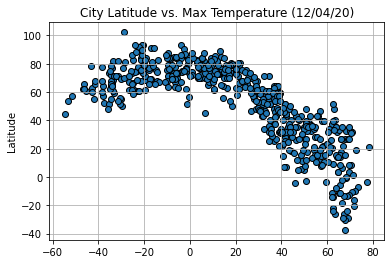

In [12]:

Latitude = clean_data["Lat"]
Max_Tempterature = clean_data["Max_Temp F"]

plt.scatter(Latitude,Max_Tempterature, edgecolors  = 'black')
plt.title("City Latitude vs. Max Temperature (12/04/20)")
plt.ylabel("Max Temperature (F)")
plt.ylabel("Latitude")
plt.grid(True)


plt.savefig("City Latitude vs. Max_Temperature.png")

#Lat Max_Temp Below COMMENTARY

In [13]:

##This scatterplot shows the relationship between latittude and temperature in the selected Cities
## There is a distinctive relationship between latitutde and temperture, the closer the city is to the equator the 
#higher the max temperature. As you move away from the equator, the max temperature gradually decreases with cities 
#above the equator showing a marginally larger decreases.

## Latitude vs. Humidity Plot

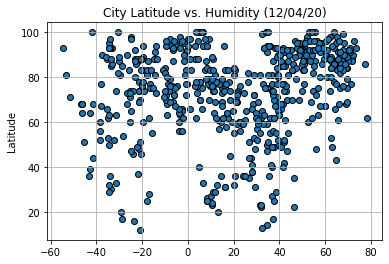

In [14]:

Latitude = clean_data["Lat"]
Humidity = clean_data["Humidity"]

plt.scatter(Latitude,Humidity, edgecolors  = 'black')
plt.title("City Latitude vs. Humidity (12/04/20)")
plt.ylabel("Humidity (%)")
plt.ylabel("Latitude")
plt.grid(True)


plt.savefig("City Latitude vs. Humidity.png")

#Lat Humidity Below COMMENTARY

In [15]:
#This scatter plot shows the relationship between latittude and humidity in the selected cities.

#Locations south of the equator seem to have a higher average humidity, while it is more varied above the equator.

## Latitude vs. Cloudiness Plot

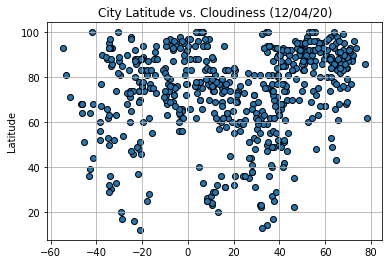

In [16]:
Latitude = clean_data["Lat"]
Cloudiness = clean_data["Cloudiness"]

plt.scatter(Latitude,Humidity, edgecolors  = 'black')
plt.title("City Latitude vs. Cloudiness (12/04/20)")
plt.ylabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.grid(True)


plt.savefig("City Latitude vs. Cloudiness.png")

#Lat Cloudiness ADD COMMENTARY

In [17]:
#This scatter plot shows the relationship between latittude and cloudiness in the selected cities.

#The does not appear to be a relationship.

## Latitude vs. Wind Speed Plot

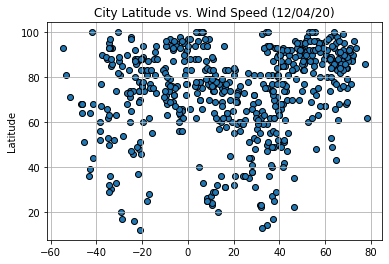

In [18]:
Latitude = clean_data["Lat"]
Winds = clean_data["Winds"]

plt.scatter(Latitude,Humidity, edgecolors  = 'black')
plt.title("City Latitude vs. Wind Speed (12/04/20)")
plt.ylabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.grid(True)


plt.savefig("City Latitude vs.Wind Speed.png")

#Lat Wind Speed ADD COMMENTARY

In [19]:
#This scatter plot shows the relationship between latittude and wind speed the selected cities.

#The does not appear to be a relationship.

## Linear Regression

In [20]:
# Create Northern and Southern Hemisphere DataFrames

#Northern Hemisphere (Lat > 0)
weather_df_north = clean_data[clean_data['Lat'] >= 0]

#Southern Hemisphere (Lat < 0)
weather_df_south = clean_data[clean_data['Lat'] < 0]

In [21]:
weather_df_south

,Lat,Lon,Max_temp,Humidity,Cloudiness,Winds,Country,Date,Max_Temp F
City,,,,,,,,,
Busselton,-33.65,115.33,301.00,30,0,1.66,AU,1607394830,82.130
Atuona,-9.80,-139.03,299.14,72,1,7.40,PF,1607394938,78.782
Poya,-21.35,165.15,305.22,48,32,1.26,NC,1607394938,89.726
Vanimo,-2.67,141.30,303.25,66,100,2.45,PG,1607394939,86.180
Ushuaia,-54.80,-68.30,280.15,93,90,7.20,AR,1607394714,44.600
...,...,...,...,...,...,...,...,...,...
Beloha,-25.17,45.05,291.88,73,0,6.10,MG,1607394982,65.714
Opuwo,-18.06,13.84,292.02,25,20,2.68,NaN,1607394982,65.966
Maragogi,-9.01,-35.22,297.68,80,13,3.87,BR,1607394983,76.154


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

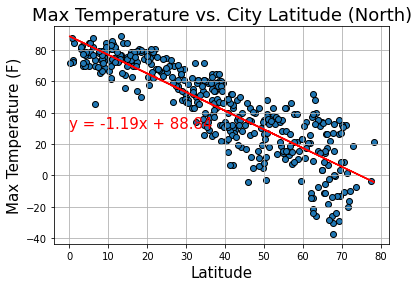

The r squared is: -0.8646294842964408


In [36]:
#setup linear regression and line equation
x_values = weather_df_north['Lat']
y_values = weather_df_north['Max_Temp F']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0,30),fontsize=15,color='red')
plt.grid()
plt.title('Max Temperature vs. City Latitude (North)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Max Temperature (F)',size=15)
plt.savefig("Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

#r2
print(f'The r squared is: {rvalue}')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

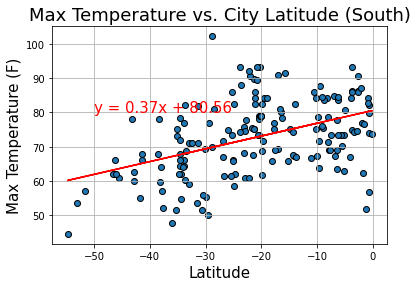

The r squared is: 0.4536014494109927


In [37]:

x_values = weather_df_south['Lat']
y_values = weather_df_south['Max_Temp F']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(-50,80),fontsize=15,color='red')
plt.grid()
plt.title('Max Temperature vs. City Latitude (South)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Max Temperature (F)',size=15)
plt.savefig("Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

#r2
print(f'The r squared is: {rvalue}')

In [25]:
#Max Temperature and Latitutde Linear Regression Comparison
#Both the northern and southern hemispheres show drop in temperature as the graph moves away from 0 (equator).

#The northern hemisphere linear regression line has a steeper slope this indicates that there is a steeper drop in 
#temperature the farther north you travel away from the equator.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

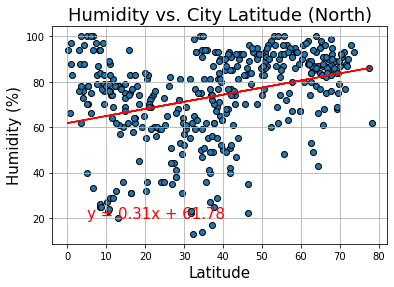

The r squared is: 0.3223315759802633


In [38]:
#setup linear regression and line equation
x_values = weather_df_north['Lat']
y_values = weather_df_north['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(5,20),fontsize=15,color='red')
plt.grid()
plt.title('Humidity vs. City Latitude (North)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Humidity (%)',size=15)
plt.savefig("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

#r2
print(f'The r squared is: {rvalue}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

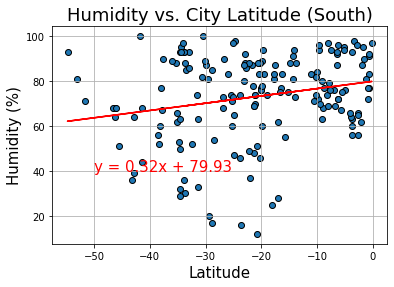

The r squared is: 0.22509533064265588


In [39]:
#setup linear regression and line equation
x_values = weather_df_south['Lat']
y_values = weather_df_south['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(-50,40),fontsize=15,color='red')
plt.grid()
plt.title('Humidity vs. City Latitude (South)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Humidity (%)',size=15)
plt.savefig("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

#r2
print(f'The r squared is: {rvalue}')

In [28]:
#Humidity vs. Latitutde Linear Regression Comparison

#Both hemispheres show very slight changes in Humidity as you move away from the equator (latititude = 0).
#The farther you travel north the humidity increases very slightly (slope = 0.31). The farther you travel north the humidity decreases very slightly (slope = -0.32)
#It is very interesting how these two slopes are almost identical. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

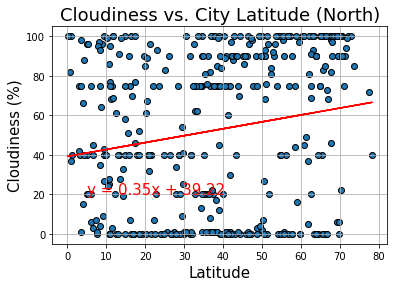

The r squared is: 0.1822159001648402


In [40]:
#setup linear regression and line equation
x_values = weather_df_north['Lat']
y_values = weather_df_north['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(5,20),fontsize=15,color='red')
plt.grid()
plt.title('Cloudiness vs. City Latitude (North)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Cloudiness (%)',size=15)
plt.savefig("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

#r2
print(f'The r squared is: {rvalue}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

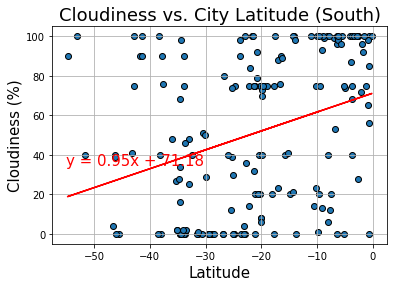

The r squared is: 0.3243903155368941


In [41]:
#setup linear regression and line equation
x_values = weather_df_south['Lat']
y_values = weather_df_south['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(-55,35),fontsize=15,color='red')
plt.grid()
plt.title('Cloudiness vs. City Latitude (South)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Cloudiness (%)',size=15)
plt.savefig("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

#r2
print(f'The r squared is: {rvalue}')

In [31]:
#Cloudiness vs. Latitutde Linear Regression Comparison

#Both Hemipheres show strong linear slopes as you moe away from zero. Similar to the humidity the degree of these slopes is almost
#identical as you move away from the equator

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

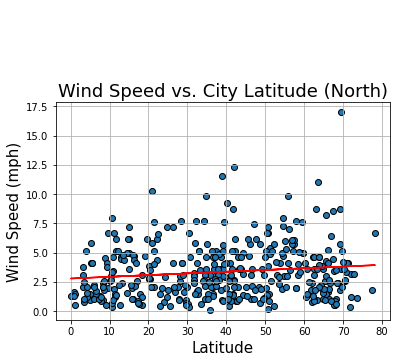

The r squared is: 0.13119519528542115


In [42]:

#setup linear regression and line equation
x_values = weather_df_north['Lat']
y_values = weather_df_north['Winds']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(5,25),fontsize=15,color='red')
plt.grid()
plt.title('Wind Speed vs. City Latitude (North)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Wind Speed (mph)',size=15)
plt.savefig("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()

#r2
print(f'The r squared is: {rvalue}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

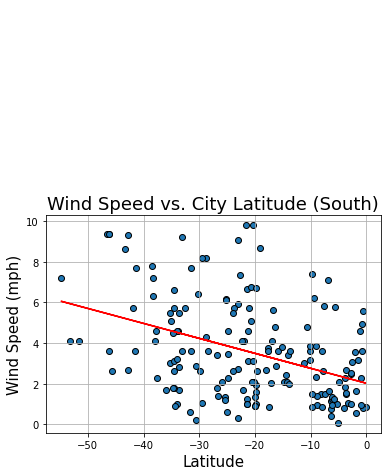

The r squared is: -0.4020014613721983


In [43]:
#setup linear regression and line equation
x_values = weather_df_south['Lat']
y_values = weather_df_south['Winds']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(-50,20),fontsize=15,color='red')
plt.grid()
plt.title('Wind Speed vs. City Latitude (South)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Wind Speed (mph)',size=15)
plt.savefig("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()

#r2
print(f'The r squared is: {rvalue}')

In [34]:
#Wind Speed (mph) vs. Latitutde Linear Regression Comparison

# These graphs show a net increase in wind speed as you travel further away from the equator. 
# The southern hemisphere showing a larger increase in wind speed as you travel away from the equator. 